In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/qwedsa/dataset_level1.pkl
/kaggle/input/qwedsa/dataset_level2.pkl
/kaggle/input/ranking2/ranking.xlsx
/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2016 matches.csv
/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2012 matches.csv
/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2010 matches.csv
/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2007 matches.csv
/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2014 matches.csv
/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2021 matches.csv
/kaggle/input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2009 matches.csv
/kaggle/input/asia-cup-cricket-1984-to-2022/wicketkeeper data t20i.csv
/kaggle/input/asia-cup-cricket-1984-to-2022/wicketkeeper data odi.csv
/kaggle/input/asia-cup-cricket-1984-to-2022/bowler data odi.csv
/kaggle/input/asia-cup-cricket-1984-to-2022/bowler data t20i.csv
/kaggle/input/asia-cup-cricket-19

## There are 2 models

- Predict batting Team Final Score
- T20 World Cup Winner 2022

## Data Visualizations of T20 World Cups


# Predict batting Team Final Score

In [2]:
import pickle
matches = pickle.load(open('../input/qwedsa/dataset_level1.pkl','rb'))
#matches.iloc[0]['innings'][0]['1st innings']['deliveries']

In [3]:
matches.head(3)

,innings,info.dates,info.outcome.winner,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.city
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-17],Sri Lanka,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Melbourne Cricket Ground,1,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-19],Sri Lanka,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[SD Fry, SJ Nogajski]","Simonds Stadium, South Geelong",2,Victoria
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-22],Australia,[A Zampa],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Adelaide Oval,3,NaN


In [4]:
count = 1
delivery_df = pd.DataFrame()
for index, row in matches.iterrows():
    if count in [75,108,150,180,268,360,443,458,584,748,982,1052,1111,1226,1345]:
        count+=1
        continue
    count+=1
    ball_of_match = []
    batsman = []
    bowler = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    match_id = []
    city = []
    winner=[]
    venue = []
    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            ball_of_match.append(key)
            batsman.append(ball[key]['batsman'])
            bowler.append(ball[key]['bowler'])
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            winner.append(row['info.outcome.winner'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')
    loop_df = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'batting_team':batting_team,
            'ball':ball_of_match,
            'batsman':batsman,
            'bowler':bowler,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'city':city,
            'winner':winner,
            'venue':venue
        })
    delivery_df = delivery_df.append(loop_df)

In [5]:
def bowl(row):
    for team in row['teams']:
        if team != row['batting_team']:
            return team

In [6]:
delivery_df['bowling_team'] = delivery_df.apply(bowl,axis=1)

In [7]:
new_df=delivery_df

In [8]:
delivery_df.drop(columns=['teams'],inplace=True)

teams = [
    'Australia',
    'India',
    'Bangladesh',
    'New Zealand',
    'South Africa',
    'England',
    'West Indies',
    'Afghanistan',
    'Pakistan',
    'Sri Lanka'    
]

In [9]:
delivery_df = delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df = delivery_df[delivery_df['bowling_team'].isin(teams)]

In [10]:
delivery_df.head(4)

,match_id,batting_team,ball,batsman,bowler,runs,player_dismissed,city,winner,venue,bowling_team
0,2,Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Sri Lanka,Melbourne Cricket Ground,Sri Lanka
1,2,Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Sri Lanka,Melbourne Cricket Ground,Sri Lanka
2,2,Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Sri Lanka,Melbourne Cricket Ground,Sri Lanka
3,2,Australia,0.4,M Klinger,SL Malinga,2,0,NaN,Sri Lanka,Melbourne Cricket Ground,Sri Lanka


In [11]:
output=delivery_df
output[output['city'].isnull()]['venue'].value_counts()

Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

In [12]:
x = np.where(output['city'].isnull(), output['venue'].str.split().apply(lambda x:x[0]), output['city'])
output['city'] = x

In [13]:
output.drop(columns=['venue'],inplace=True)

In [14]:
total_df = output.groupby('match_id').sum()['runs'].reset_index()
output = output.merge(total_df,on='match_id')

In [15]:
output.head(4)

,match_id,batting_team,ball,batsman,bowler,runs_x,player_dismissed,city,winner,bowling_team,runs_y
0,2,Australia,0.1,AJ Finch,SL Malinga,0,0,Melbourne,Sri Lanka,Sri Lanka,168
1,2,Australia,0.2,AJ Finch,SL Malinga,0,0,Melbourne,Sri Lanka,Sri Lanka,168
2,2,Australia,0.3,AJ Finch,SL Malinga,1,0,Melbourne,Sri Lanka,Sri Lanka,168
3,2,Australia,0.4,M Klinger,SL Malinga,2,0,Melbourne,Sri Lanka,Sri Lanka,168


In [16]:
output['current_score'] = output.groupby('match_id').cumsum()['runs_x']
output['over'] = output['ball'].apply(lambda x:str(x).split(".")[0])
output['ball_no'] = output['ball'].apply(lambda x:str(x).split(".")[1])
output['balls_bowled'] = (output['over'].astype('int')*6) + output['ball_no'].astype('int')
output['crr'] = round((output['current_score']*6)/output['balls_bowled'],2)
output['player_dismissed'] = output['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
output['player_dismissed'] = output['player_dismissed'].astype('int')
output['player_dismissed'] = output.groupby('match_id').cumsum()['player_dismissed']
output['wickets_left'] = 10 - output['player_dismissed']


In [17]:
# final_df.sample(final_df.shape[0])

In [18]:
final_df = output[['match_id','batting_team','bowling_team','runs_x','current_score','balls_bowled','wickets_left','crr','city','runs_y']]

final_df = final_df.sample(final_df.shape[0])
final_df['balls_left'] = 120 - final_df['balls_bowled']
final_df['balls_left'] = final_df['balls_left'].apply(lambda x:0 if x<0 else x)

final_df['crr'] = round((final_df['current_score']*6)/final_df['balls_bowled'],2)

final_df.drop(columns=['balls_bowled'],inplace=True)

groups = final_df.groupby('match_id')
match_ids = final_df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs_x'].values.tolist())
    
final_df['last_five'] = last_five
final_df.dropna(inplace=True)

In [19]:
eligible_cities = final_df['city'].value_counts()[final_df['city'].value_counts() > 600].index.tolist()
final_df = final_df[final_df['city'].isin(eligible_cities)]

In [20]:
# X = final_df[['batting_team', 'bowling_team', 'current_score',
#        'wickets_left', 'crr', 'city', 'balls_left', 'last_five','winner']]
# y = final_df[['runs_y']]
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

X = final_df.drop(columns=['match_id','runs_x','runs_y'])
y = final_df['runs_y']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)



In [21]:
final_df.columns

Index(['match_id', 'batting_team', 'bowling_team', 'runs_x', 'current_score',
       'wickets_left', 'crr', 'city', 'runs_y', 'balls_left', 'last_five'],
      dtype='object')

In [22]:
final_df.head(3)

,match_id,batting_team,bowling_team,runs_x,current_score,wickets_left,crr,city,runs_y,balls_left,last_five
41402,649,England,Afghanistan,1,84,8,6.90,Colombo,196,47,57.0
19367,309,Pakistan,England,4,42,8,7.88,Manchester,190,88,51.0
30009,529,South Africa,India,0,42,9,9.33,Nottingham,130,93,49.0


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [24]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',RandomForestRegressor())
])

In [25]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9178619559814806
4.249330472774884


# T20 world cup win

In [26]:
output.head(2)

,match_id,batting_team,ball,batsman,bowler,runs_x,player_dismissed,city,winner,bowling_team,runs_y,current_score,over,ball_no,balls_bowled,crr,wickets_left
0,2,Australia,0.1,AJ Finch,SL Malinga,0,0,Melbourne,Sri Lanka,Sri Lanka,168,0,0,1,1,0.0,10
1,2,Australia,0.2,AJ Finch,SL Malinga,0,0,Melbourne,Sri Lanka,Sri Lanka,168,0,0,2,2,0.0,10


In [27]:
new_df.head(3)

,match_id,batting_team,ball,batsman,bowler,runs,player_dismissed,city,winner,venue,bowling_team
0,2,Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Sri Lanka,Melbourne Cricket Ground,Sri Lanka
1,2,Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Sri Lanka,Melbourne Cricket Ground,Sri Lanka
2,2,Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Sri Lanka,Melbourne Cricket Ground,Sri Lanka


In [28]:
eligible_cities = output['city'].value_counts()[output['city'].value_counts() > 600].index.tolist()
output = output[output['city'].isin(eligible_cities)]

In [29]:
new_df=new_df.groupby(['city','bowling_team','batting_team','winner']).mean()[['runs']].reset_index()

In [30]:
new_df.head(4)

,city,bowling_team,batting_team,winner,runs
0,Abu Dhabi,Afghanistan,Ireland,Afghanistan,1.033058
1,Abu Dhabi,Afghanistan,Ireland,Ireland,1.785714
2,Abu Dhabi,Afghanistan,United Arab Emirates,Afghanistan,1.131783
3,Abu Dhabi,Australia,Pakistan,Pakistan,1.280992


In [31]:
output= new_df
# output['winner'] = (output['batting_team'] == output['winner']).astype(int)
# output.rename({'winner': 'Team_A_Won'}, axis=1,inplace=True)

x=output[['bowling_team','batting_team']]
y=output[['winner']]


In [32]:
output['winner'].value_counts()
output.drop(['city','runs'],axis=1,inplace=True)

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm



In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [35]:
#x_train["city"].nunique()

In [36]:
#convert team-1 and team-2 from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(output, prefix=['Team_1', 'Team_2'], columns=['batting_team','bowling_team'])

# Separate X and y sets
X = final.drop(['winner'], axis=1)
y = final["winner"]


# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
final


,winner,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Belgium,Team_1_Bermuda,Team_1_Bhutan,Team_1_Botswana,Team_1_Canada,Team_1_Cayman Islands,...,Team_2_South Africa,Team_2_Spain,Team_2_Sri Lanka,Team_2_Thailand,Team_2_Uganda,Team_2_United Arab Emirates,Team_2_United States of America,Team_2_Vanuatu,Team_2_West Indies,Team_2_Zimbabwe
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ireland,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Pakistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Australia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,New Zealand,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
693,Sri Lanka,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
694,Namibia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
695,Kenya,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#rf = RandomForestClassifier(n_estimators=100, max_depth=20,
 #                             random_state=0)

rf=LogisticRegression()
rf.fit(X_train, y_train) 


score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)


print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.770
Test set accuracy:  0.510


In [39]:
currentt=pd.read_csv('../input/currentt20/currentT20W.csv')
ranking=pd.read_excel("../input/ranking2/ranking.xlsx")

In [40]:
currentt.head(4)

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result
0,1,1,16/10/2022 15:00,"Kardinia Park, Geelong",Sri Lanka,Namibia,NaN
1,2,1,16/10/2022 19:00,"Kardinia Park, Geelong",UAE,Netherlands,NaN
2,3,1,17/10/2022 15:00,"Bellerive Oval, Hobart",West Indies,Scotland,NaN
3,4,1,17/10/2022 19:00,"Bellerive Oval, Hobart",Zimbabwe,Ireland,NaN


In [41]:
ranking.head(10)

,POS,TEAM,MATCHES,RATING
0,1,India,55,268
1,2,England,42,263
2,3,Pakistan,48,259
3,4,South Africa,37,258
4,5,New Zealand,43,253
5,6,Australia,42,251
6,7,West Indies,49,238
7,8,Sri Lanka,44,235
8,9,Bangladesh,46,222
9,10,Afghanistan,27,219


In [42]:
currentt.columns

Index(['Match Number', 'Round Number', 'Date', 'Location', 'Home Team',
       'Away Team', 'Result'],
      dtype='object')

In [43]:
fixtures=currentt
fixtures.head(3)

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result
0,1,1,16/10/2022 15:00,"Kardinia Park, Geelong",Sri Lanka,Namibia,NaN
1,2,1,16/10/2022 19:00,"Kardinia Park, Geelong",UAE,Netherlands,NaN
2,3,1,17/10/2022 15:00,"Bellerive Oval, Hobart",West Indies,Scotland,NaN


In [44]:
fixtures.tail()

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result
40,41,7,06/11/2022 15:00,"Adelaide Oval, Adelaide",Pakistan,Bangladesh,NaN
41,42,7,06/11/2022 19:00,"MCG, Melbourne",Zimbabwe,India,NaN
42,43,Semi Finals,09/11/2022 19:00,"SCG, Sydney",Group 1 Winner,Group 2 Runner Up,NaN
43,44,Semi Finals,10/11/2022 19:00,"Adelaide Oval, Adelaide",Group 2 Winner,Group 1 Runner Up,NaN
44,45,Final,13/11/2022 19:00,"MCG, Melbourne",Winner of Semi-Final 1,Winner of Semi-Final 2,NaN


In [45]:
# List for storing the group stage games
pred_set = []
fixtures=currentt
# Create new columns with ranking position of each team
fixtures.insert(1, 'home_position', fixtures['Home Team'].map(ranking.set_index('TEAM')['POS']))
fixtures.insert(2, 'away_position', fixtures['Away Team'].map(ranking.set_index('TEAM')['POS']))

# We only need the group stage games, so we have to slice the dataset

In [46]:
fixtures['home_position'].value_counts()

6.0     5
8.0     4
11.0    3
17.0    3
12.0    3
1.0     3
4.0     3
3.0     3
7.0     2
14.0    2
13.0    2
2.0     2
9.0     2
5.0     2
10.0    2
15.0    1
Name: home_position, dtype: int64

In [47]:
fixtures.head(6)

,Match Number,home_position,away_position,Round Number,Date,Location,Home Team,Away Team,Result
0,1,8.0,14.0,1,16/10/2022 15:00,"Kardinia Park, Geelong",Sri Lanka,Namibia,NaN
1,2,15.0,17.0,1,16/10/2022 19:00,"Kardinia Park, Geelong",UAE,Netherlands,NaN
2,3,7.0,13.0,1,17/10/2022 15:00,"Bellerive Oval, Hobart",West Indies,Scotland,NaN
3,4,11.0,12.0,1,17/10/2022 19:00,"Bellerive Oval, Hobart",Zimbabwe,Ireland,NaN
4,5,14.0,17.0,1,18/10/2022 15:00,"Kardinia Park, Geelong",Namibia,Netherlands,NaN
5,6,8.0,15.0,1,18/10/2022 19:00,"Kardinia Park, Geelong",Sri Lanka,UAE,NaN


In [48]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['home_position'] < row['away_position']:
        pred_set.append({'Team_1': row['Home Team'], 'Team_2': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Away Team'], 'Team_2': row['Home Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,Team_1,Team_2,winning_team
0,Sri Lanka,Namibia,None
1,UAE,Netherlands,None
2,West Indies,Scotland,None
3,Zimbabwe,Ireland,None
4,Namibia,Netherlands,None


In [49]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


pred_set = pred_set.drop(['winner'], axis=1)
pred_set.head()

,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Belgium,Team_1_Bermuda,Team_1_Bhutan,Team_1_Botswana,Team_1_Canada,Team_1_Cayman Islands,Team_1_Denmark,...,Team_2_South Africa,Team_2_Spain,Team_2_Sri Lanka,Team_2_Thailand,Team_2_Uganda,Team_2_United Arab Emirates,Team_2_United States of America,Team_2_Vanuatu,Team_2_West Indies,Team_2_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
predictions = rf.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    
    else:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print("")

Namibia and Sri Lanka
Winner: Sri Lanka

Netherlands and UAE
Winner: UAE

Scotland and West Indies
Winner: West Indies

Ireland and Zimbabwe
Winner: Zimbabwe

Netherlands and Namibia
Winner: Namibia

UAE and Sri Lanka
Winner: Sri Lanka

Scotland and Ireland
Winner: Ireland

Zimbabwe and West Indies
Winner: West Indies

Netherlands and Sri Lanka
Winner: Sri Lanka

UAE and Namibia
Winner: Namibia

Ireland and West Indies
Winner: West Indies

Scotland and Zimbabwe
Winner: Zimbabwe

Australia and New Zealand
Winner: New Zealand

Afghanistan and England
Winner: England

Ireland and Sri Lanka
Winner: Sri Lanka

Pakistan and India
Winner: India

Netherlands and Bangladesh
Winner: Bangladesh

Zimbabwe and South Africa
Winner: South Africa

Sri Lanka and Australia
Winner: Australia

Ireland and England
Winner: England

Afghanistan and New Zealand
Winner: New Zealand

Bangladesh and South Africa
Winner: South Africa

Netherlands and India
Winner: India

Zimbabwe and Pakistan
Winner: Pakistan

Ir

In [51]:
predictions


array(['Sri Lanka', 'Netherlands', 'West Indies', 'Ireland',
       'Netherlands', 'Sri Lanka', 'Ireland', 'West Indies', 'Sri Lanka',
       'Namibia', 'West Indies', 'Zimbabwe', 'Australia', 'England',
       'Sri Lanka', 'India', 'Netherlands', 'South Africa', 'Sri Lanka',
       'England', 'New Zealand', 'South Africa', 'India', 'Pakistan',
       'Afghanistan', 'Australia', 'New Zealand', 'Bangladesh',
       'Pakistan', 'India', 'Australia', 'Sri Lanka', 'England',
       'Netherlands', 'India', 'Pakistan', 'New Zealand', 'Australia',
       'Sri Lanka', 'South Africa', 'Pakistan', 'India', 'India', 'India',
       'India'], dtype=object)

In [52]:
df = pd.DataFrame(data=predictions)

df.rename(columns={0:'country'},inplace=True)
df.head(8)

,country
0,Sri Lanka
1,Netherlands
2,West Indies
3,Ireland
4,Netherlands
5,Sri Lanka
6,Ireland
7,West Indies


In [53]:
df.value_counts()

country     
India           8
Sri Lanka       7
Australia       4
Netherlands     4
Pakistan        4
England         3
New Zealand     3
South Africa    3
West Indies     3
Ireland         2
Afghanistan     1
Bangladesh      1
Namibia         1
Zimbabwe        1
dtype: int64

In [54]:
backup_pred_set.head(2)

,Team_1,Team_2,winning_team
0,Sri Lanka,Namibia,None
1,UAE,Netherlands,None


In [55]:
Finalq = pd.DataFrame()
#Finalr=Finalr.reset_index(drop=True)
Finalrq = pd.concat([backup_pred_set,df], axis = 1)
Finalrq.head(10)
#FinalW['country'].value_counts()
Finalrq.drop(["winning_team"],axis=1,inplace=True)
Finalrq.tail(9)

,Team_1,Team_2,country
36,New Zealand,Ireland,New Zealand
37,Australia,Afghanistan,Australia
38,England,Sri Lanka,Sri Lanka
39,South Africa,Netherlands,South Africa
40,Pakistan,Bangladesh,Pakistan
41,India,Zimbabwe,India
42,Group 2 Runner Up,Group 1 Winner,India
43,Group 1 Runner Up,Group 2 Winner,India
44,Winner of Semi-Final 2,Winner of Semi-Final 1,India


In [56]:
semi = [('Sri Lanka', 'India'),
            ('Pakistan', 'Australia')]

In [57]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to ICC ranking
    for match in matches:
        positions.append(ranking.loc[ranking['TEAM'] == match[0],'POS'].iloc[0])
        positions.append(ranking.loc[ranking['TEAM'] == match[1],'POS'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1
        
        # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['winner'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

In [58]:
semi = [('Sri Lanka', 'India'),
            ('Pakistan', 'Australia')]

In [59]:
clean_and_predict(semi, ranking, final, rf)

Sri Lanka and India
Winner: India

Australia and Pakistan
Winner: Pakistan



In [60]:
# Finals
finals = [('India', 'Pakistan')]

clean_and_predict(finals, ranking, final, rf)

Pakistan and India
Winner: India



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


# Data Visualizations of T20 World Cups

In [61]:
import numpy as np
import pandas as pd
from yaml import safe_load
import os
from tqdm import tqdm

In [62]:
import glob
import pandas as pd

glued_data = pd.DataFrame()
for file_name in glob.glob('../input/t20-world-cups20072021/T20 World Cups.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    glued_data = pd.concat([glued_data,x],axis=0)

In [63]:
wc07=pd.read_csv("../input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2007 matches.csv")
wc09=pd.read_csv("../input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2009 matches.csv")
wc10=pd.read_csv("../input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2010 matches.csv")
wc12=pd.read_csv("../input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2012 matches.csv")
wc14=pd.read_csv("../input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2014 matches.csv")
wc16=pd.read_csv("../input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2016 matches.csv")
wc21=pd.read_csv("../input/t20-world-cups20072021/T20 World Cups/T20 World Cup 2021 matches.csv")

wc=[wc07,wc09,wc10,wc12,wc14,wc16,wc21]

In [64]:
print(wc09.shape)
print(wc07.shape)
wc09.tail(5)

(27, 10)
(27, 10)


,Match No,Date,Group/Semi Final/Final,Match Between,Venue,Winning Team Score,Losing Team Score,Winner Team,Result,Player Of The Match
22,23,2009-06-16,Group F,New Zealand vs Sri Lanka,"Trent Bridge, Nottingham",158/5(20 overs),110(17 overs),Sri Lanka,Sri Lanka won by 48 runs,Ajantha Mendis
23,24,2009-06-16,Group E,India vs South Africa,"Trent Bridge, Nottingham",130/5(20 overs),118/8(20 overs),South Africa,South Africa won by 12 runs,AB de Villiers
24,25,2009-06-18,1st Semi Final,Pakistan vs South Africa,"Trent Bridge, Nottingham",149/4(20 overs),142/5(20 overs),Pakistan,Pakistan won by 7 runs,Shahid Afridi
25,26,2009-06-19,2nd Semi Final,Sri Lanka vs West Indies,"Kennington Oval, London",158/5(20 overs),101(17.4 overs),Sri Lanka,Sri Lanka won by 57 runs,Tillakaratne Dilshan
26,27,2009-06-21,Final,Pakistan vs Sri Lanka,"Lord's, London",138/6(20 overs),139/2(18.4 overs),Pakistan,Pakistan won by 8 wickets,Shahid Afridi


In [65]:
TotalT20 = pd.DataFrame()
#Finalr=Finalr.reset_index(drop=True)
TotalT20 = pd.concat([wc07,wc09,wc10,wc12,wc14,wc16,wc21],axis=0)
print(TotalT20.shape)
TotalT20.tail(5)

(223, 11)


,Match No,Date,Group/Semi Final/Final,Match Between,Venue,Winning Team Score,Losing Team Score,Winner Team,Result,Player Of The Match,Group/Super Eights/Semi Final/Final
40,41,2021-07-11,Super 12 Group 2,Pakistan vs Scotland,"Sharjah Cricket Stadium, Sharjah",189/4(20 overs),117/6(20 overs),Pakistan,Pakistan won by 72 runs,Shoaib Malik,NaN
41,42,2021-08-11,Super 12 Group 2,India vs Namibia,"Dubai International Cricket Stadium, Dubai",136/1(15.2 overs),132/8(20 overs),India,India won by 9 wickets,Ravindra Jadeja,NaN
42,43,2021-10-11,1st Semi Final,England vs New Zealand,"Sheikh Zayed Stadium, Abu Dhabi",167/5(19 overs),166/4(20 overs),New Zealand,New Zealand won by 5 wickets,Daryl Mitchell,NaN
43,44,2021-11-11,2nd Semi Final,Pakistan vs Australia,"Dubai International Cricket Stadium, Dubai",177/5(19 overs),176/4(20 overs),Australia,Australia won by 5 wickets,Matthew Wade,NaN
44,45,2021-11-14,Final,New Zealand vs Australia,"Dubai International Cricket Stadium, Dubai",173/2(18.5 overs),172/4(20 overs),Australia,Australia won by 8 wickets,Mitchell Marsh,NaN


In [66]:
TotalT20[TotalT20['Match No']==54]

,Match No,Date,Group/Semi Final/Final,Match Between,Venue,Winning Team Score,Losing Team Score,Winner Team,Result,Player Of The Match,Group/Super Eights/Semi Final/Final


In [67]:
TotalT20['Group/Semi Final/Final'].unique()

array(['Group A', 'Group C', 'Group D', 'Group B', 'Group E', 'Group F',
       '1st Semi Final', '2nd Semi Final', 'Final', nan, 'Group 2',
       'Group 1', 'Super 10 Group 2', 'Super 10 Group 1',
       'Super 12 Group 1', 'Super 12 Group 2'], dtype=object)

In [68]:
TotalT20[['Team_1','Team_2']]=TotalT20['Match Between'].str.split(" vs ",expand=True)

TotalT20['Winning Score'] = TotalT20['Winning Team Score'].str.extract(r'(^\d+)')
TotalT20['Losing Score'] = TotalT20['Losing Team Score'].str.extract(r'(^\d+)')
TotalT20['New_date']=pd.to_datetime(TotalT20['Date'])

# TotalT20[['Group','Semi Final','Final']]=pd.DataFrame([ x.split() for x in TotalT20['Group/Semi Final/Final'].tolist() ])

TotalT20.drop(['Date','Match Between','Winning Team Score','Losing Team Score'],axis=1,inplace=True)

In [69]:
TotalT20['Winning Score'] = pd.to_numeric(TotalT20['Winning Score'],errors = 'coerce')
TotalT20['Losing Score'] = pd.to_numeric(TotalT20['Losing Score'],errors = 'coerce')

In [70]:
# TotalT20['venue1'] = TotalT20['Venue'].str.split('\-').str[-1]
#TotalT20['venue2'] = [street_num[-1] if any(i.isdigit() for i in street_num[0]) else 'N/A' for street_num in TotalT20['Venue'].apply(lambda s: s.split(" ",2))]
# x = np.where(TotalT20['venue2'].isnull(), TotalT20['Venue'].str.split().apply(lambda x:x[-2]), TotalT20['venue2'])
# TotalT20['venue2'] = x

In [71]:
TotalT20.shape

(223, 12)

In [72]:
TotalT20['Venue'].value_counts()

Zahur Ahmed Chowdhury Stadium, Chattogram                     15
R.Premadasa Stadium, Colombo                                  15
Sheikh Zayed Stadium, Abu Dhabi                               15
Shere Bangla National Stadium, Dhaka                          14
Dubai International Cricket Stadium, Dubai                    13
Kensington Oval, Bridgetown, Barbados                         11
Sharjah Cricket Stadium, Sharjah                              11
Trent Bridge, Nottingham                                      10
Daren Sammy National Cricket Stadium, Gros Islet, St Lucia    10
Kingsmead, Durban                                              9
Newlands, Cape Town                                            9
Vidarbha Cricket Association Stadium, Nagpur                   9
Pallekele International Cricket Stadium, Pallekele             9
Kennington Oval, London                                        9
The Wanderers Stadium, Johannesburg                            9
Lord's, London           

In [73]:
TotalT20F=TotalT20[TotalT20['Group/Semi Final/Final'].isin(['Final'])]
TotalT20F.shape

(6, 12)

In [74]:
TotalT20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 44
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Match No                             223 non-null    int64         
 1   Group/Semi Final/Final               196 non-null    object        
 2   Venue                                223 non-null    object        
 3   Winner Team                          218 non-null    object        
 4   Result                               223 non-null    object        
 5   Player Of The Match                  218 non-null    object        
 6   Group/Super Eights/Semi Final/Final  27 non-null     object        
 7   Team_1                               223 non-null    object        
 8   Team_2                               223 non-null    object        
 9   Winning Score                        221 non-null    float64       
 10  Losing Score   

In [75]:
TotalT20.columns

Index(['Match No', 'Group/Semi Final/Final', 'Venue', 'Winner Team', 'Result',
       'Player Of The Match', 'Group/Super Eights/Semi Final/Final', 'Team_1',
       'Team_2', 'Winning Score', 'Losing Score', 'New_date'],
      dtype='object')

In [76]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

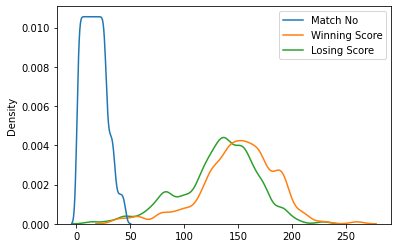

In [77]:
sns.kdeplot(data=TotalT20,bw_adjust=.5)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


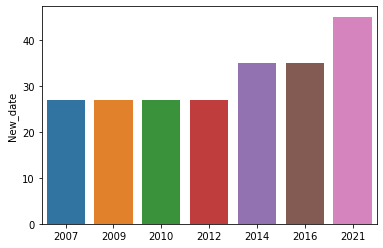

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


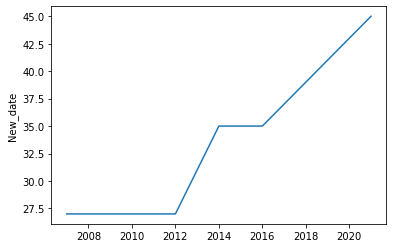

In [78]:
# TotalT20['New_date'].dt.year.value_counts()
sns.barplot(TotalT20['New_date'].dt.year.value_counts().keys(),TotalT20['New_date'].dt.year.value_counts())
plt.show()
sns.lineplot(TotalT20['New_date'].dt.year.value_counts().keys(),TotalT20['New_date'].dt.year.value_counts())
plt.show()

<Figure size 720x360 with 0 Axes>

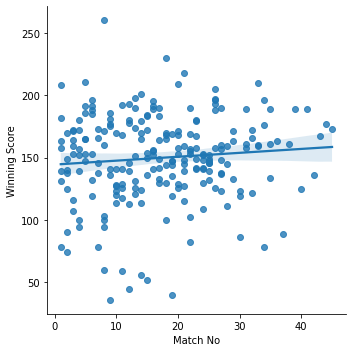

<Figure size 720x360 with 0 Axes>

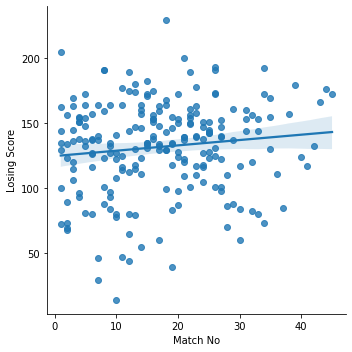

In [79]:
#sns.lineplot(x=TotalT20['Match No'],color='Orange',kde=True,rug=True,hist=False)
plt.figure(figsize=(10,5))

sns.lmplot(x='Match No',y='Winning Score',data=TotalT20,fit_reg = True)
plt.show()
plt.figure(figsize=(10,5))

sns.lmplot(x='Match No',y='Losing Score',data=TotalT20,palette='rocket')
plt.show()

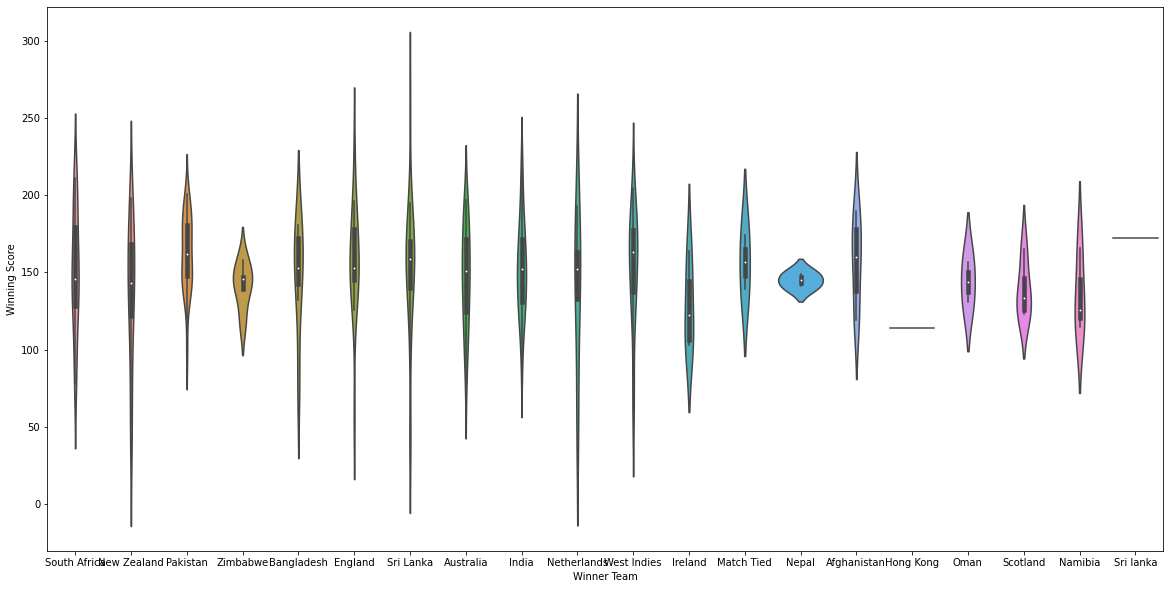

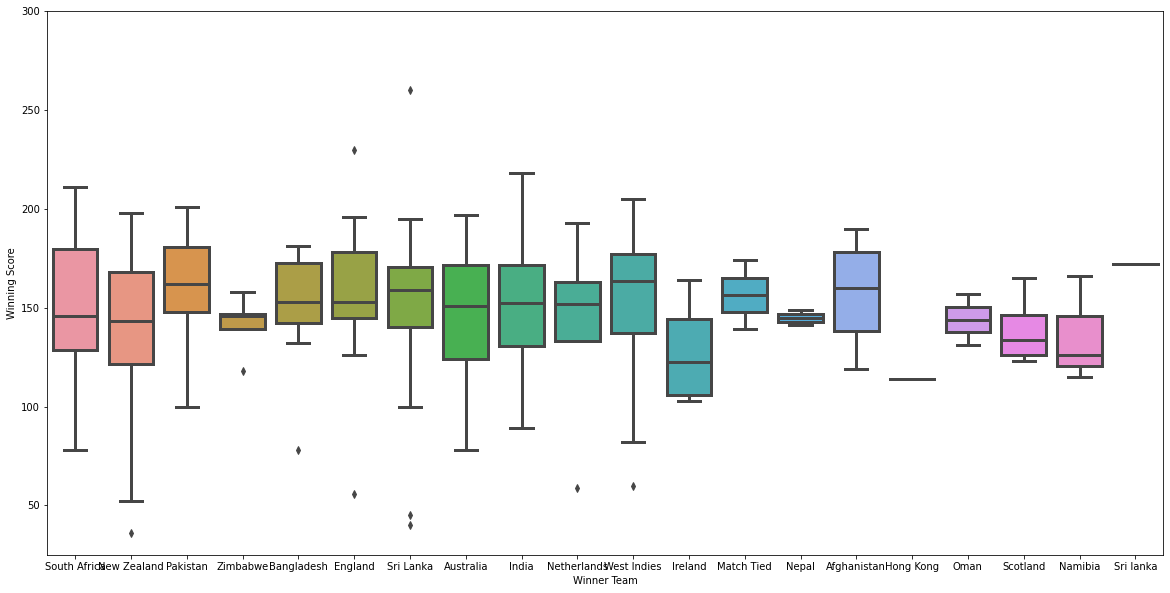

In [80]:
# ax = sns.FacetGrid(TotalT20, col="Winner Team", size=10)
# ax.map(sns.kdeplot, "Winning Score", "Losing Score", hist=True,color='red')
plt.figure(figsize=(20,10))
sns.violinplot(x='Winner Team',y='Winning Score',data=TotalT20)
plt.show()

plt.figure(figsize=(20,10))
sns.boxplot(x='Winner Team',y='Winning Score',data=TotalT20,linewidth=3)
plt.ylim(25,300);

plt.show()

Total number winning matches By Teams In All T20 World cup Matches

In [81]:
TotalT20['Player Of The Match'].value_counts()

Chris Gayle           5
Mahela Jayawardene    5
Shane Watson          5
Virat Kohli           5
Shahid Afridi         4
                     ..
Mark Gillespie        1
Tom Cooper            1
Paul Stirling         1
Shakti Gauchan        1
Mitchell Marsh        1
Name: Player Of The Match, Length: 145, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


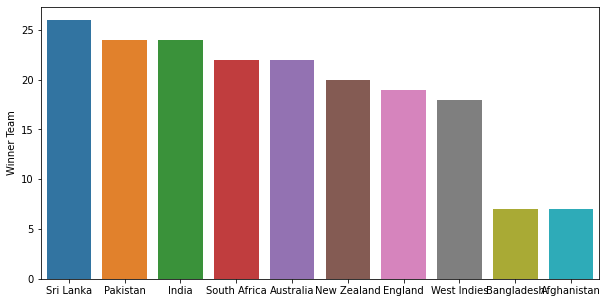

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


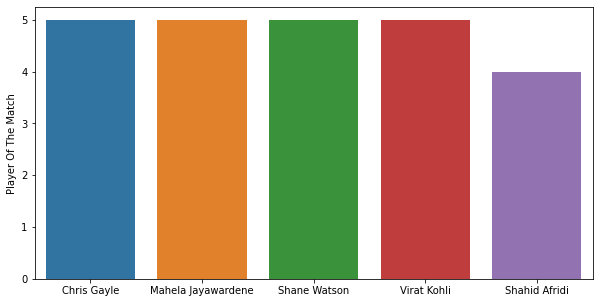

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(TotalT20['Winner Team'].value_counts()[0:10].keys(),TotalT20['Winner Team'].value_counts()[0:10])
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(TotalT20['Player Of The Match'].value_counts()[0:5].keys(),TotalT20['Player Of The Match'].value_counts()[0:5])
plt.show()

<AxesSubplot:xlabel='Group/Super Eights/Semi Final/Final', ylabel='count'>

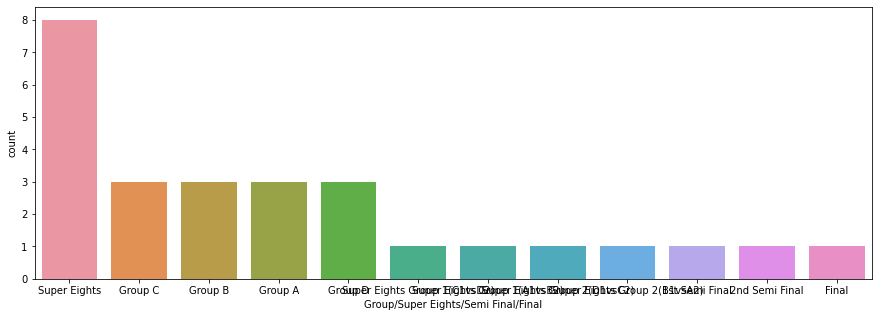

In [83]:
plt.figure(figsize=(15,5))
sns.countplot(x=TotalT20['Group/Super Eights/Semi Final/Final'],order = TotalT20['Group/Super Eights/Semi Final/Final'].value_counts().index)

In [86]:
TotalT20['Venue'].value_counts()

Zahur Ahmed Chowdhury Stadium, Chattogram                     15
R.Premadasa Stadium, Colombo                                  15
Sheikh Zayed Stadium, Abu Dhabi                               15
Shere Bangla National Stadium, Dhaka                          14
Dubai International Cricket Stadium, Dubai                    13
Kensington Oval, Bridgetown, Barbados                         11
Sharjah Cricket Stadium, Sharjah                              11
Trent Bridge, Nottingham                                      10
Daren Sammy National Cricket Stadium, Gros Islet, St Lucia    10
Kingsmead, Durban                                              9
Newlands, Cape Town                                            9
Vidarbha Cricket Association Stadium, Nagpur                   9
Pallekele International Cricket Stadium, Pallekele             9
Kennington Oval, London                                        9
The Wanderers Stadium, Johannesburg                            9
Lord's, London           

In [87]:
TotalT20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 44
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Match No                             223 non-null    int64         
 1   Group/Semi Final/Final               196 non-null    object        
 2   Venue                                223 non-null    object        
 3   Winner Team                          218 non-null    object        
 4   Result                               223 non-null    object        
 5   Player Of The Match                  218 non-null    object        
 6   Group/Super Eights/Semi Final/Final  27 non-null     object        
 7   Team_1                               223 non-null    object        
 8   Team_2                               223 non-null    object        
 9   Winning Score                        221 non-null    float64       
 10  Losing Score   

In [ ]:
# TotalT20=TotalT20.drop(['Match No','Group/Semi Final/Final', 'Venue',
#        'Winning Team Score', 'Losing Team Score'])

In [ ]:
# wc=[wc07,wc09,wc10,wc12,wc14,wc16,wc21]

# for i in wc:
#     i[['Team_1','Team_2']]=i['Match Between'].str.split(" vs ",expand=True)
#     i['New_date']=pd.to_datetime(i['Date'])
#     i['Winner Team'] = (i['Team_1'] == i['Winner Team']).astype(int)
#     i.rename({'Winner Team': 'Team_A_Won'}, axis=1,inplace=True)

In [ ]:
# wc09.head(3)
# #wc09['Team_A_Won'].value_counts()

In [ ]:
# wc09.info()